#### Implement Independent Component Analysis on Synthetic Data

In [1]:
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio, display
from Independent_Component_Analysis import FastICA
from ICA_utils import *

##### 1. A combination of sinusoidal signal and square signal

In [2]:
# Create dataset
np.random.seed(0)
n_samples = 1000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal

# Concatenate the signals to create the original data
S = np.c_[s1, s2]

# Mix data
A = np.array([[1, 3], [2, 0.5]])
X = S.dot(A.T)

# Fit ICA model
ica = FastICA(n_components=2)
S_ica = ica.fit_transform(X)

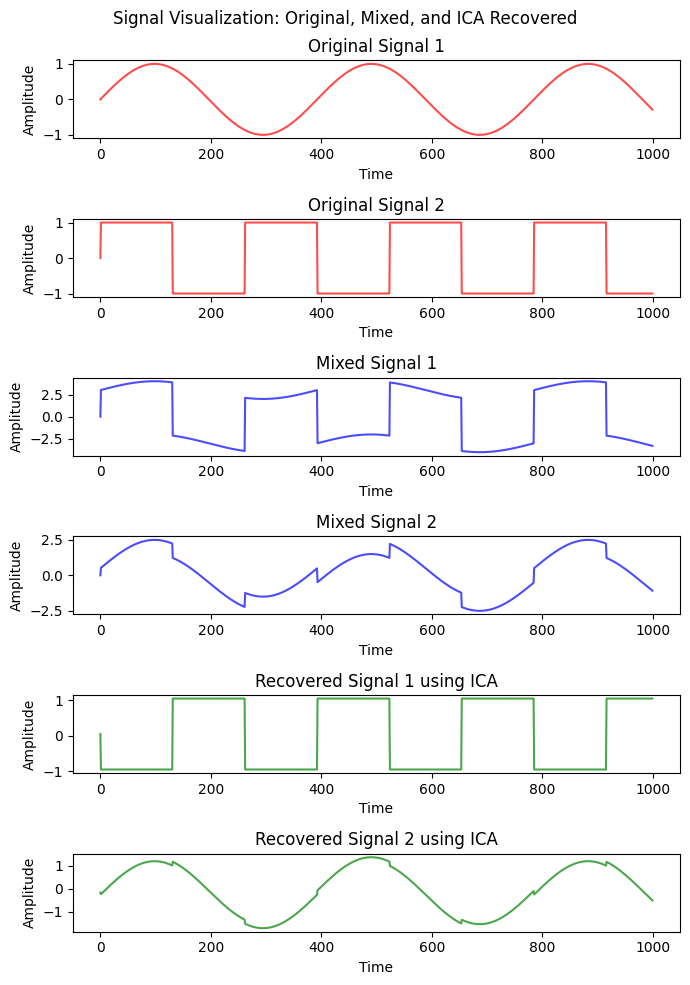

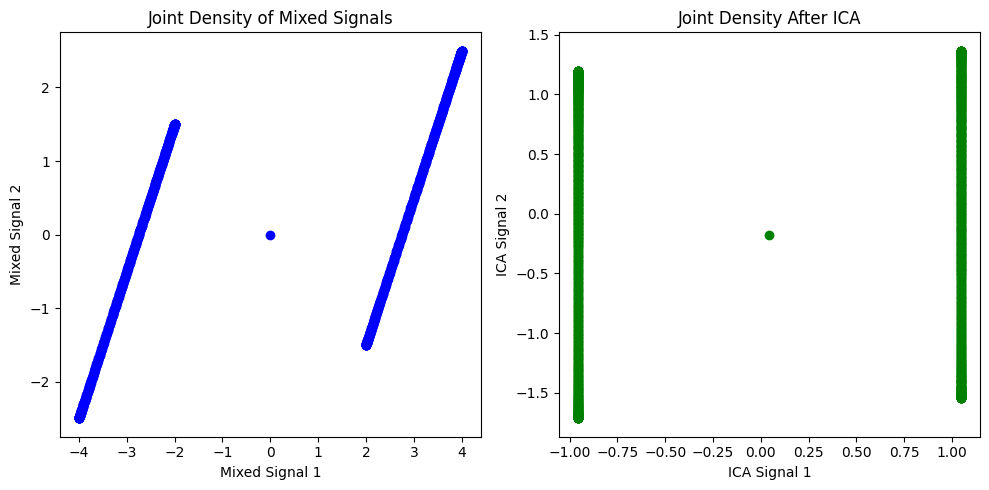

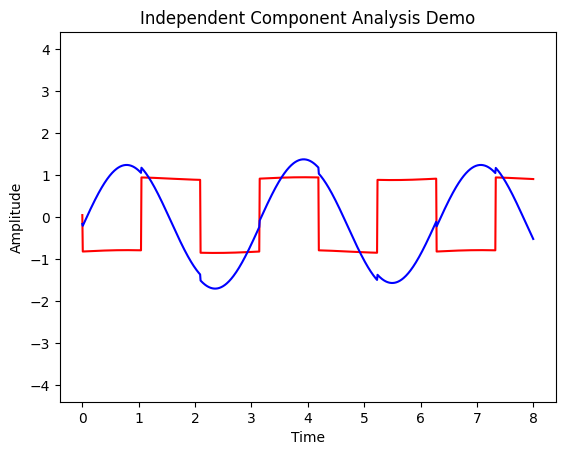

In [3]:
# Plot original, mixed, and ICA separated signals
plot_ICA_signals(S, X, S_ica)

# Plots the joint densities of mixed signals and signals separated by ICA
plot_joint_densities(X, S_ica)

# Create an animation transitioning between mixed signals and ICA separated signals
create_ica_animation(time, X, S_ica, save_path="ica_animation.gif", fps=5)

##### 2. A combination of a sawtooth wave and a sine wave

In [4]:
# Create dataset
np.random.seed(0)
n_samples = 1000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1: sinusoidal signal
s2 = 2 * (time % 1) - 1  # Signal 2: sawtooth signal

# Concatenate the signals to create the original data
S = np.c_[s1, s2]

# Mix data
A = np.array([[1, 3], [2, 0.5]])
X = S.dot(A.T)

# Fit ICA model
ica = FastICA(n_components=2)
S_ica = ica.fit_transform(X)

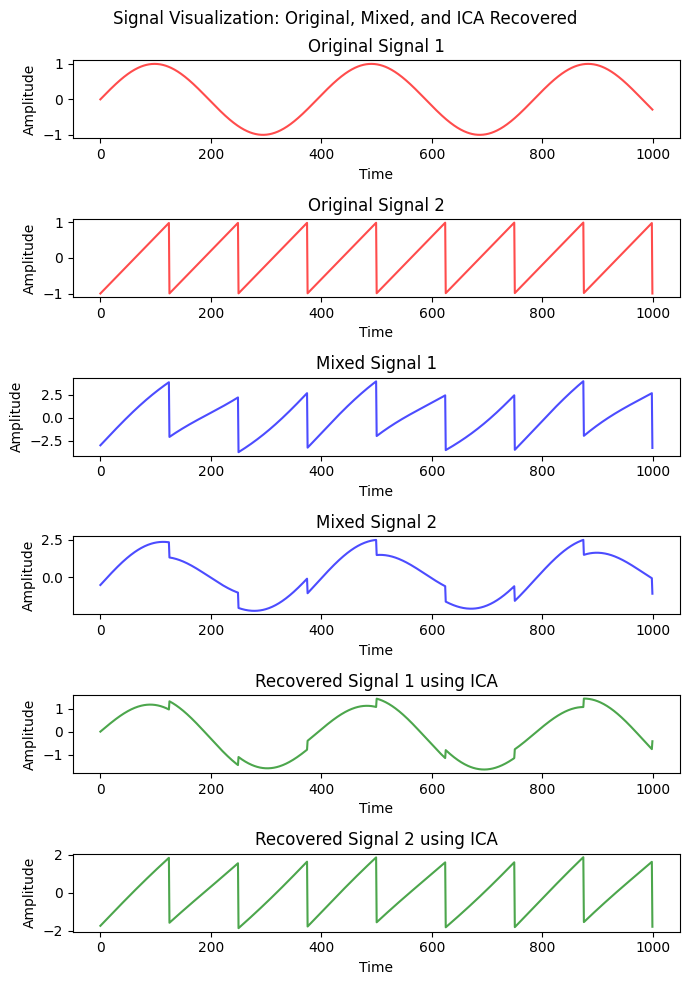

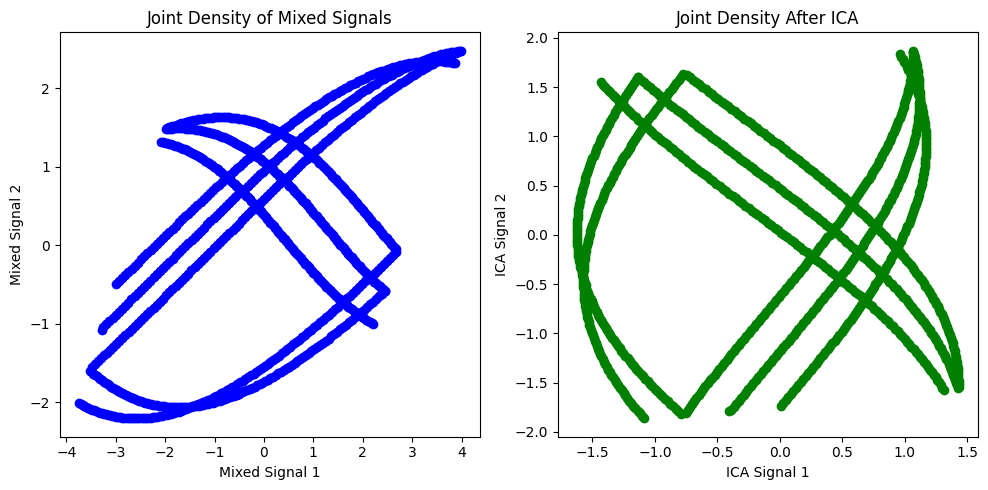

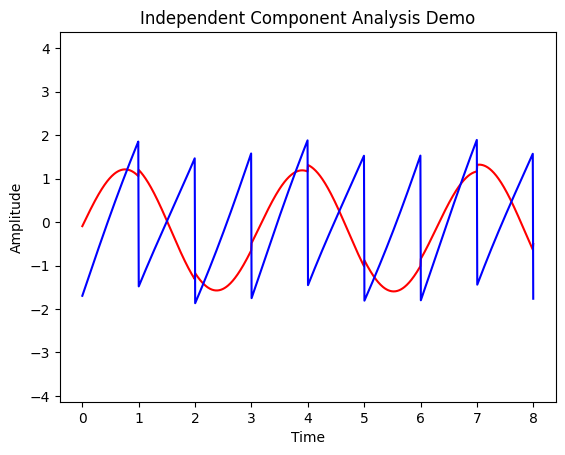

In [5]:
# Plot original, mixed, and ICA separated signals
plot_ICA_signals(S, X, S_ica)

# Plots the joint densities of mixed signals and signals separated by ICA
plot_joint_densities(X, S_ica)

# Create an animation transitioning between mixed signals and ICA separated signals
create_ica_animation(time, X, S_ica, save_path="ica_animation.gif", fps=5)

#### Implement Independent Component Analysis on Mixture of Real Sound Signals

In [6]:
# Read two source audio files
rate1, s1 = wavfile.read('../dataset/evil-laugh.wav')
rate2, s2 = wavfile.read('../dataset/oh-no-the-car-exploded.wav')

# Ensuring the signals are of same length (trimming longer one if needed)
min_length = min(len(s1), len(s2))
s1 = s1[:min_length]
s2 = s2[:min_length]

# Create the source matrix
S = np.c_[s1, s2]

# Create an artificial mixing matrix
A = np.array([[1, 0.5], [0.5, 1]])

# Mix signals
X = S.dot(A.T)

# Apply ICA
ica = FastICA(n_components=2)
S_ica = ica.fit_transform(X)

# Listen to the original, mixed, and separated signals
print("Original Signal 1")
display(Audio(s1, rate=rate1))
print("Original Signal 2")
display(Audio(s2, rate=rate2))
print("Mixed Signal 1")
display(Audio(X[:, 0], rate=rate1))
print("Mixed Signal 2")
display(Audio(X[:, 1], rate=rate2))
print("ICA Separated Signal 1")
display(Audio(S_ica[:, 0], rate=rate1))
print("ICA Separated Signal 2")
display(Audio(S_ica[:, 1], rate=rate2))

Original Signal 1


Original Signal 2


Mixed Signal 1


Mixed Signal 2


ICA Separated Signal 1


ICA Separated Signal 2


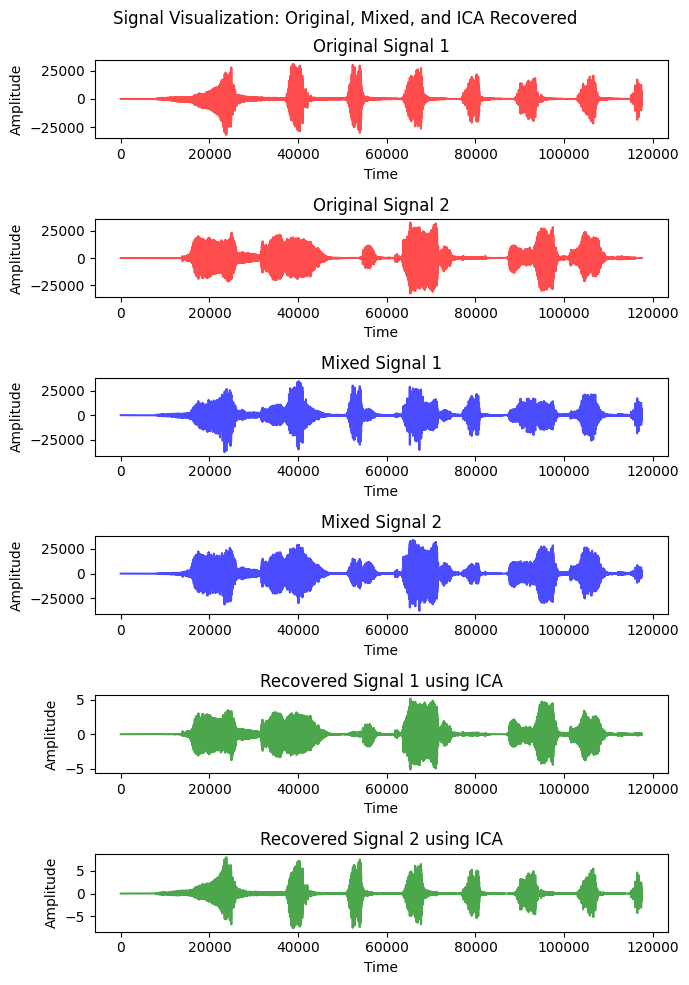

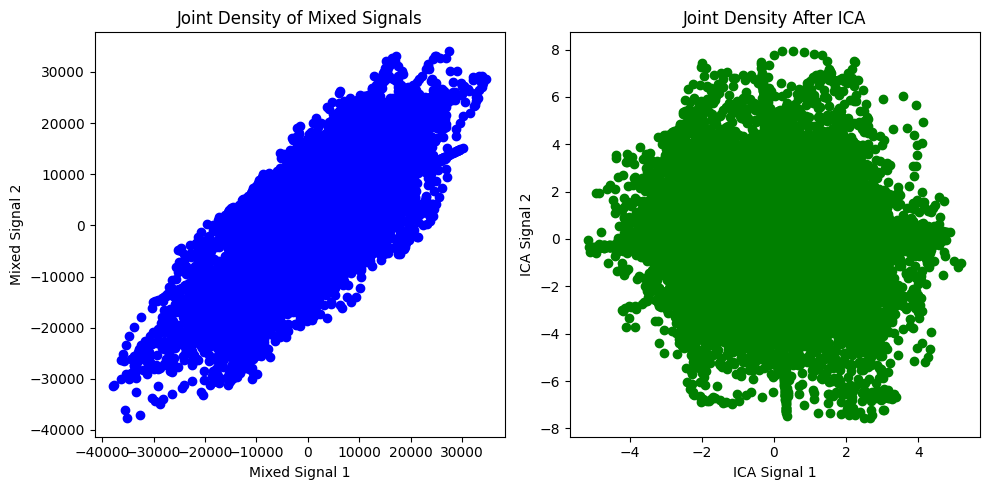

In [7]:
# Plot original, mixed, and ICA separated signals
plot_ICA_signals(S, X, S_ica)

# Plots the joint densities of mixed signals and signals separated by ICA
plot_joint_densities(X, S_ica)